In [60]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nlp
from sklearn.linear_model import LogisticRegression
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [61]:
stemmer=PorterStemmer()
df = pd.read_csv('C:/Users/antra malik/Downloads/Project/Data Set and Images used/mbti_1 4.csv') #Please add your path here

print(df.head(10))
print("*"*40)
print(df.info())

print("\n\nStarting data preprocessing...\n")

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


Starting da

In [62]:
def cleanText(text):
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', '', text)
    text = text.replace("|||"," ")
    text=text.lower()
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)

    return text

In [63]:
df['posts'] = df['posts'].apply(cleanText)
df.head()

dist = df['type'].value_counts()

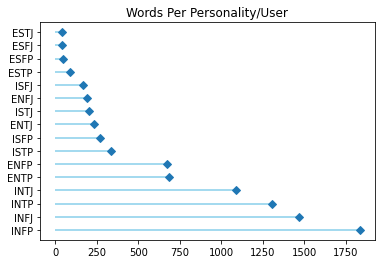

In [64]:
plt.hlines(y=list(range(16)), xmin=0, xmax=dist, color='skyblue')
plt.plot(dist, list(range(16)), "D")
plt.title("Words Per Personality/User")
plt.yticks(list(range(16)), dist.index)
plt.show()

In [65]:
from bokeh.io import output_file, show
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [66]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

In [67]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

print(y.shape)
print(X.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=5)

(8675,)
(8675, 6)


In [68]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Training Data Set",round(acc_random_forest,2,), "%")

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print("Testing Data Set", round(acc_random_forest,2,), "%")
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

#Ml on introversion/extroversion column
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print("outcome shape",yy.shape)
print("input shape for machine learning data",XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)

random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)
Y_predictionn = random_forestt.predict(XX_test)

random_forestt.score(XX_train, yy_train)
acc_random_forestt = round(random_forestt.score(XX_train, yy_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")

# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XX_train, yy_train)

Y_predd = logregg.predict(XX_test)

acc_logg = round(logregg.score(XX_train, yy_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XX_train, yy_train)

Y_predd = knnn.predict(XX_test)

acc_knnn = round(knnn.score(XX_train, yy_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

#Ml on Intuitive/sensing column
XXX = df.drop(['type','posts','N-S'], axis=1).values
yyy = df['N-S'].values
print("outcome shape",yyy.shape)
print("input shape for machine learning data",XXX.shape)

XXX_train,XXX_test,yyy_train,yyy_test=train_test_split(XXX,yyy,test_size = 0.1, random_state=5)

random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XXX_train, yyy_train)

Y_prediction = random_forestt.predict(XXX_test)

random_forestt.score(XXX_train, yyy_train)
acc_random_forestt = round(random_forestt.score(XXX_train, yyy_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")

# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XXX_train, yyy_train)

Y_predd = logregg.predict(XXX_test)
acc_logg = round(logregg.score(XXX_train, yyy_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XXX_train, yyy_train)

Y_predd = knnn.predict(XXX_test)

acc_knnn = round(knnn.score(XXX_train, yyy_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

#Ml on Thinking/Feeling column
X4 = df.drop(['type','posts','T-F'], axis=1).values
y4 = df['T-F'].values

print("outcome shape",y4.shape)
print("input shape for machine learning data",X4.shape)

X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size = 0.1, random_state=5)

random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(X4_train, y4_train)

Y_prediction = random_forestt.predict(X4_test)

random_forestt.score(X4_train, y4_train)
acc_random_forestt = round(random_forestt.score(X4_train, y4_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(X4_train, y4_train)

Y_predd = logregg.predict(X4_test)

acc_logg = round(logregg.score(X4_train, y4_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(X4_train, y4_train)

Y_predd = knnn.predict(X4_test)

acc_knnn = round(knnn.score(X4_train, y4_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

#Ml on judging/perceiving column
X5 = df.drop(['type','posts','J-P'], axis=1).values
y5 = df['J-P'].values

print("outcome shape",y5.shape)
print("input shape for machine learning data",X5.shape)

X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size = 0.1, random_state=5)

random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(X5_train, y5_train)

Y_prediction = random_forestt.predict(X5_test)
random_forestt.score(X5_train, y5_train)
acc_random_forestt = round(random_forestt.score(X5_train, y5_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")

# Logistic Regression
logregg = LogisticRegression()
logregg.fit(X5_train, y5_train)

Y_predd = logregg.predict(X5_test)

acc_logg = round(logregg.score(X5_train, y5_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(X5_train, y5_train)

Y_predd = knnn.predict(X5_test)

acc_knnn = round(knnn.score(X5_train, y5_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

Training Data Set 91.95 %
Testing Data Set 17.94 %


C:\Users\antra malik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


23.45 %
47.46 %
outcome shape (8675,)
input shape for machine learning data (8675, 9)
Random Forest Predictions Model 99.12 %
Logisitic Regression Prediction Accuracy 77.23 %
Knn neighbor prediction value 83.63 %
outcome shape (8675,)
input shape for machine learning data (8675, 9)
Random Forest Predictions Model 99.32 %
Logisitic Regression Prediction Accuracy 86.03 %
Knn neighbor prediction value 88.66 %
outcome shape (8675,)
input shape for machine learning data (8675, 9)
Random Forest Predictions Model 98.19 %
Logisitic Regression Prediction Accuracy 63.53 %
Knn neighbor prediction value 78.22 %
outcome shape (8675,)
input shape for machine learning data (8675, 9)
Random Forest Predictions Model 98.28 %
Logisitic Regression Prediction Accuracy 60.38 %
Knn neighbor prediction value 77.01 %


In [69]:
import cv2
import nltk
import nlp
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
dataFile_1 = df[df['type'] == 'INTJ']
text = str(dataFile_1['posts'].tolist())

img=cv2.imread("C:/Users/antra malik/Downloads/Project/Data Set and Images used/intj.png") #Please add your path here

rgbimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

INTJ_mask = np.array(rgbimg)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INTJ_mask, stopwords=stopwords)

text = (" ").join(tokens_without_sw)

[nltk_data] Downloading package punkt to C:\Users\antra
[nltk_data]     malik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


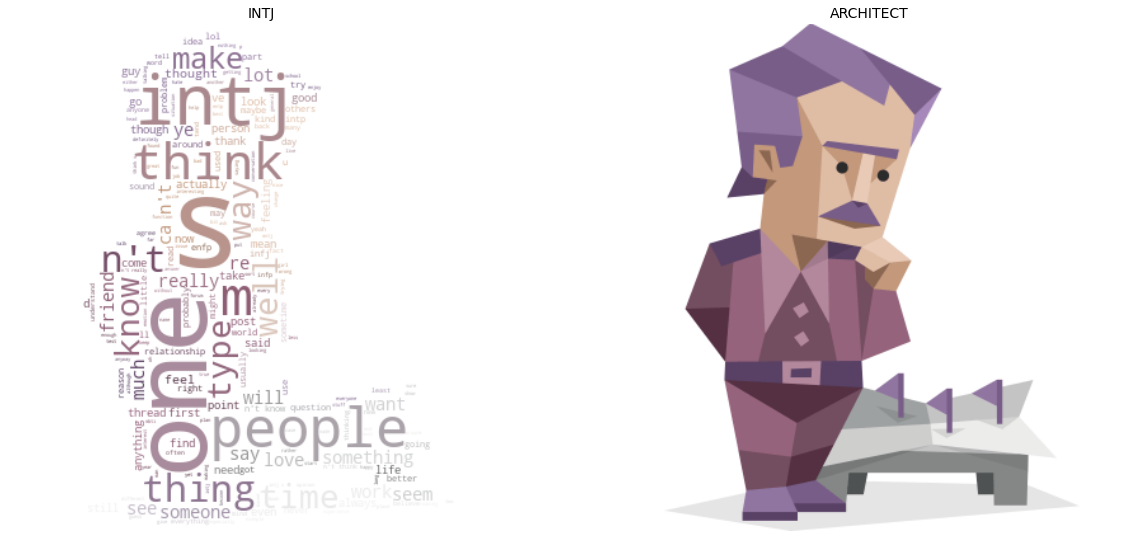

In [70]:
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(INTJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('INTJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(INTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ARCHITECT', loc='Center', fontsize=14)
plt.axis("off")
plt.show()

(-0.5, 399.5, 399.5, -0.5)

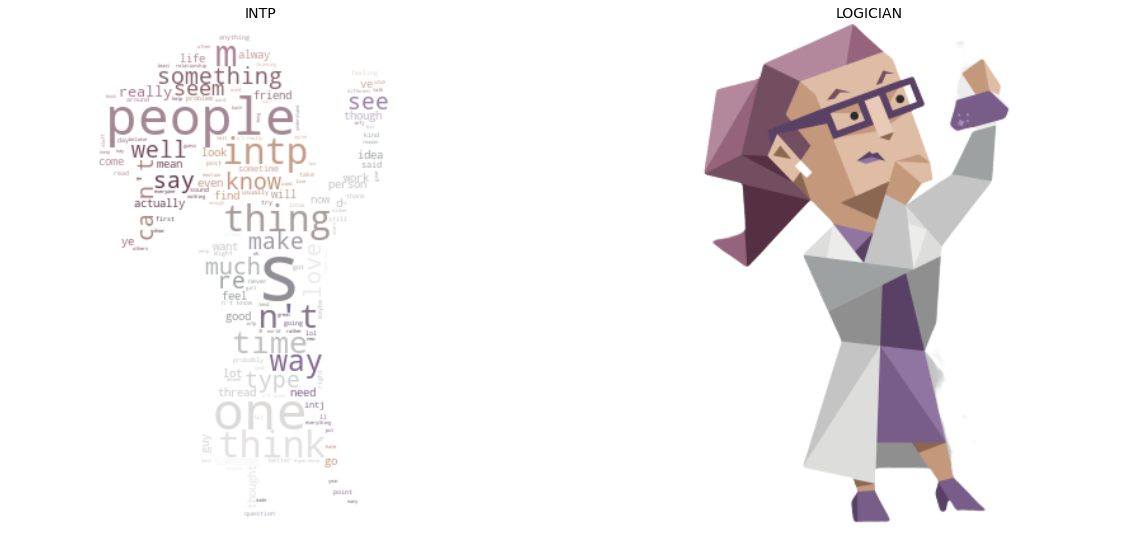

In [71]:
#INTP
import cv2
dataFile_2 = df[df['type'] == 'INTP']
text = str(dataFile_2['posts'].tolist())

img2=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/intp-2.png') #Please add your path here

rgbimg2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
INTP_mask = np.array(rgbimg2)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INTP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(INTP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('INTP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(INTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('LOGICIAN', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

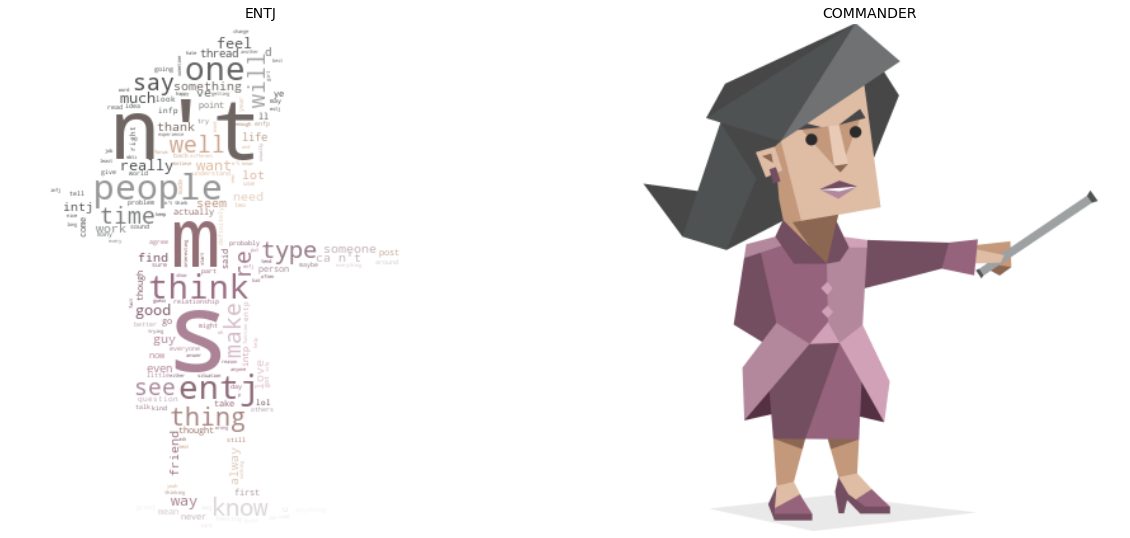

In [72]:
import cv2
dataFile_3 = df[df['type'] == 'ENTJ']
text = str(dataFile_3['posts'].tolist())
img3=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/entj.png') #Please add your path here

imgr3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
ENTJ_mask = np.array(imgr3)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ENTJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ENTJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ENTJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('COMMANDER', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

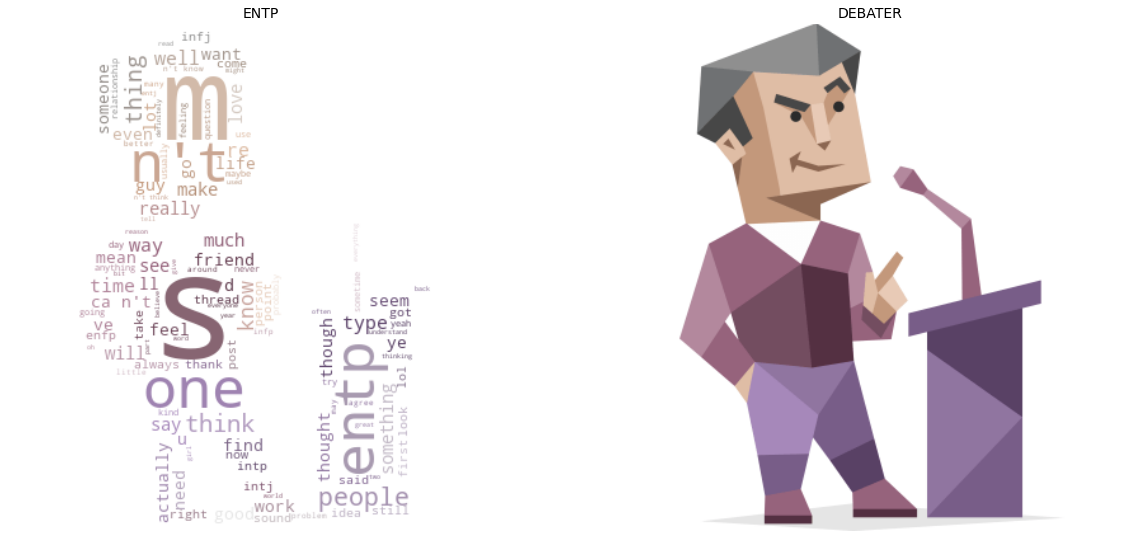

In [73]:
import cv2
dataFile_4 = df[df['type'] == 'ENTP']
text = str(dataFile_4['posts'].tolist())
img4=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/entp.png') #Please add your path here
imgr4=cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

ENTP_mask = np.array(imgr4)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ENTP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ENTP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ENTP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('DEBATER', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

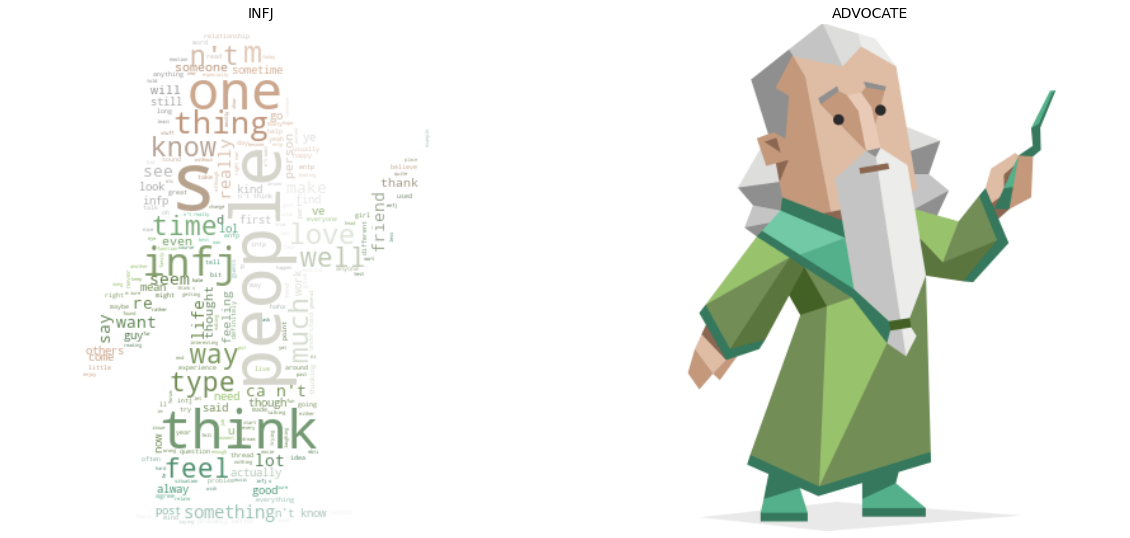

In [74]:
import cv2
dataFile_5 = df[df['type'] == 'INFJ']
text = str(dataFile_5['posts'].tolist())
img5=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/infj.png') #Please add your path here
imgr5=cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
INFJ_mask = np.array(imgr5)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INFJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(INFJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('INFJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(INFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ADVOCATE', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

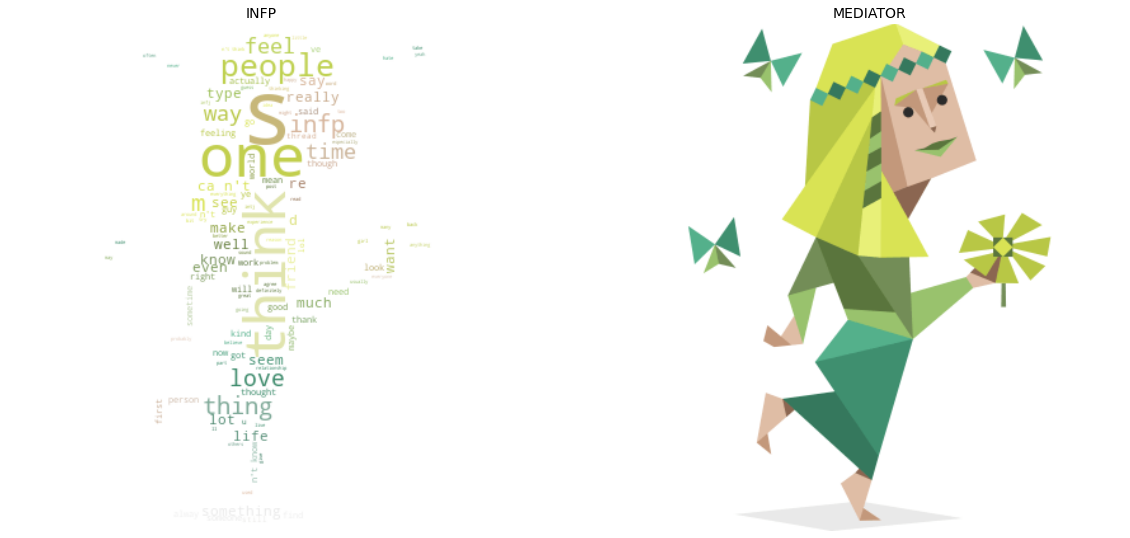

In [75]:
import cv2
dataFile_6 = df[df['type'] == 'INFP']
text = str(dataFile_6['posts'].tolist())
img6=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/infp.png') #Please add your path here
imgr6=cv2.cvtColor(img6,cv2.COLOR_BGR2RGB)
INFP_mask = np.array(imgr6)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INFP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(INFP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('INFP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(INFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('MEDIATOR', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

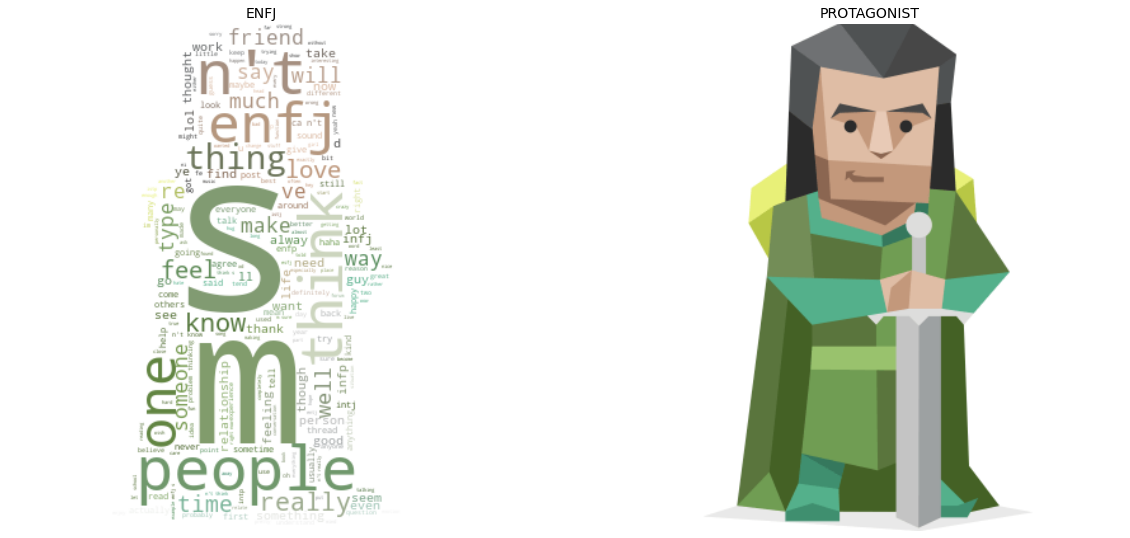

In [76]:
import cv2
dataFile_7 = df[df['type'] == 'ENFJ']
text = str(dataFile_7['posts'].tolist())
img7=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/enfj.png') #Please add your path here
imgr7=cv2.cvtColor(img7,cv2.COLOR_BGR2RGB)
ENFJ_mask = np.array(imgr7)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ENFJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ENFJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ENFJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('PROTAGONIST', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

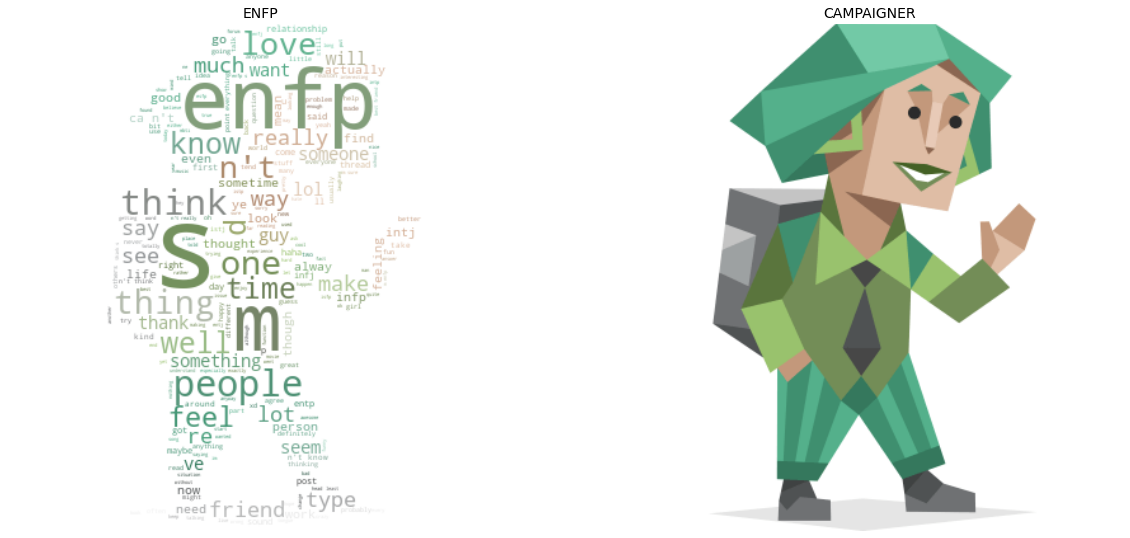

In [77]:
import cv2
dataFile_8 = df[df['type'] == 'ENFP']
text = str(dataFile_8['posts'].tolist())
img8=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/enfp.png') #Please add your path here
imgr8=cv2.cvtColor(img8,cv2.COLOR_BGR2RGB)
ENFP_mask = np.array(imgr8)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ENFP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ENFP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ENFP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('CAMPAIGNER', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

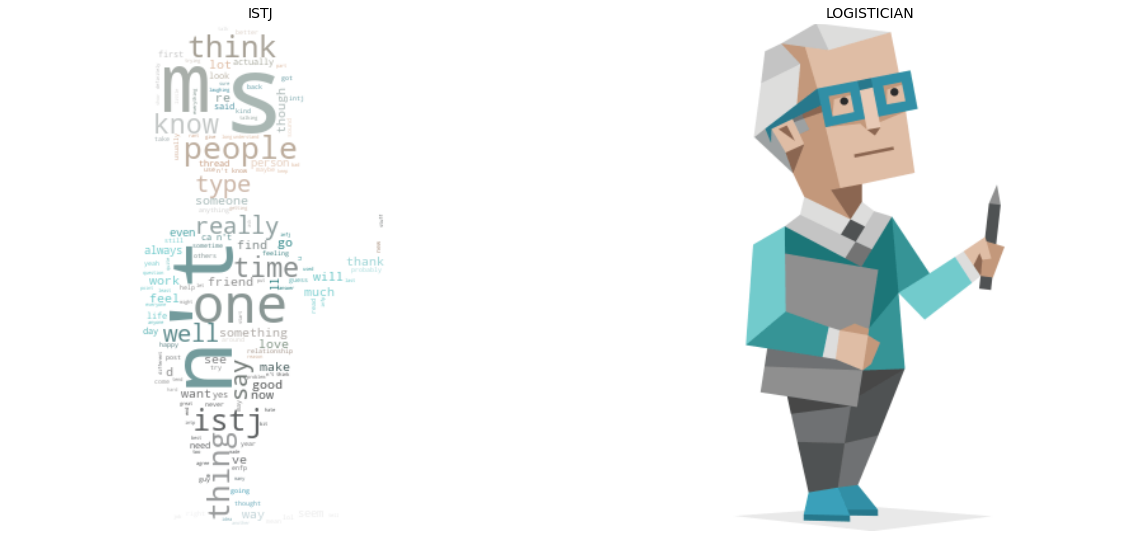

In [78]:
import cv2
dataFile_9 = df[df['type'] == 'ISTJ']
text = str(dataFile_9['posts'].tolist())
img9=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/istj.png') #Please add your path here
imgr9=cv2.cvtColor(img9,cv2.COLOR_BGR2RGB)
ISTJ_mask = np.array(imgr9)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ISTJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ISTJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ISTJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('LOGISTICIAN', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

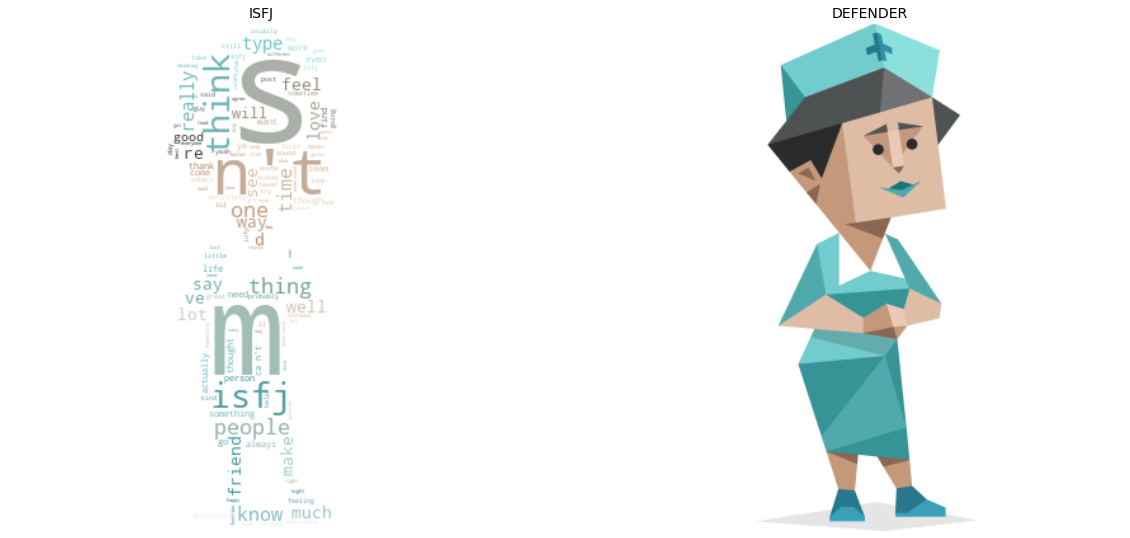

In [79]:
import cv2
dataFile_10 = df[df['type'] == 'ISFJ']
text = str(dataFile_10['posts'].tolist())
img10=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/isfj.png') #Please add your path here
imgr10=cv2.cvtColor(img10,cv2.COLOR_BGR2RGB)
ISFJ_mask = np.array(imgr10)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ISFJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ISFJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ISFJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('DEFENDER', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

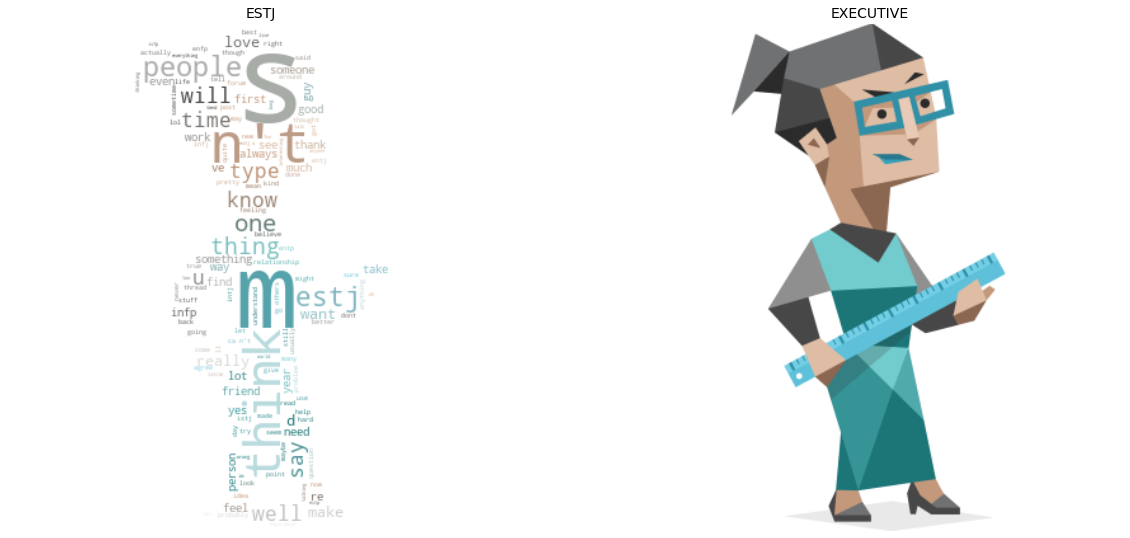

In [80]:
import cv2
dataFile_11 = df[df['type'] == 'ESTJ']
text = str(dataFile_11['posts'].tolist())
img11=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/estj.png') #Please add your path here
imgr11=cv2.cvtColor(img11,cv2.COLOR_BGR2RGB)
ESTJ_mask = np.array(imgr11)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ESTJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ESTJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ESTJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('EXECUTIVE', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

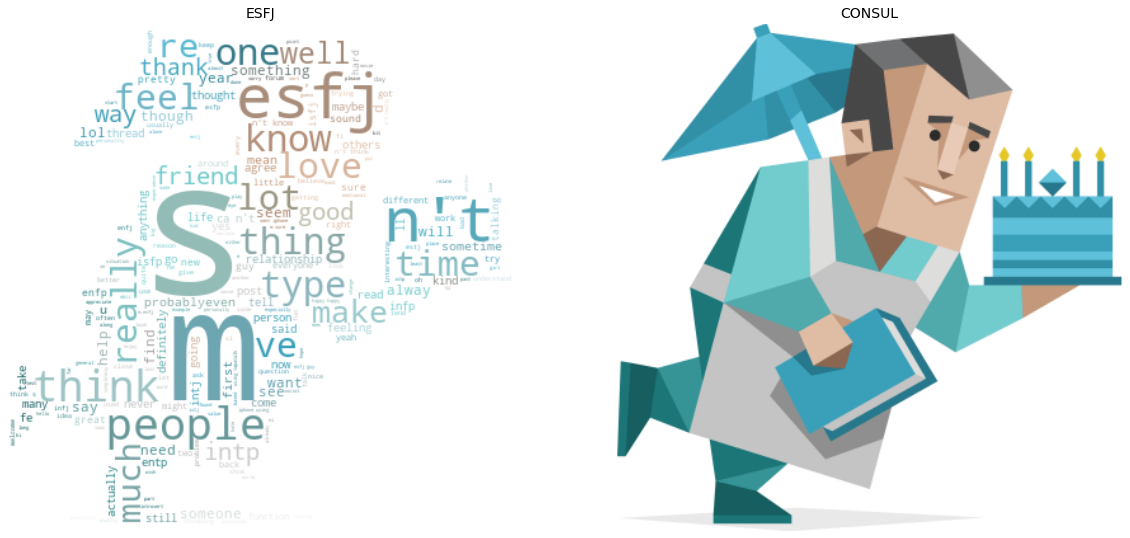

In [81]:
import cv2
dataFile_12 = df[df['type'] == 'ESFJ']
text = str(dataFile_12['posts'].tolist())
img12=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/esfj.png') #Please add your path here
imgr12=cv2.cvtColor(img12,cv2.COLOR_BGR2RGB)
ESFJ_mask = np.array(imgr12)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ESFJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ESFJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ESFJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('CONSUL', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

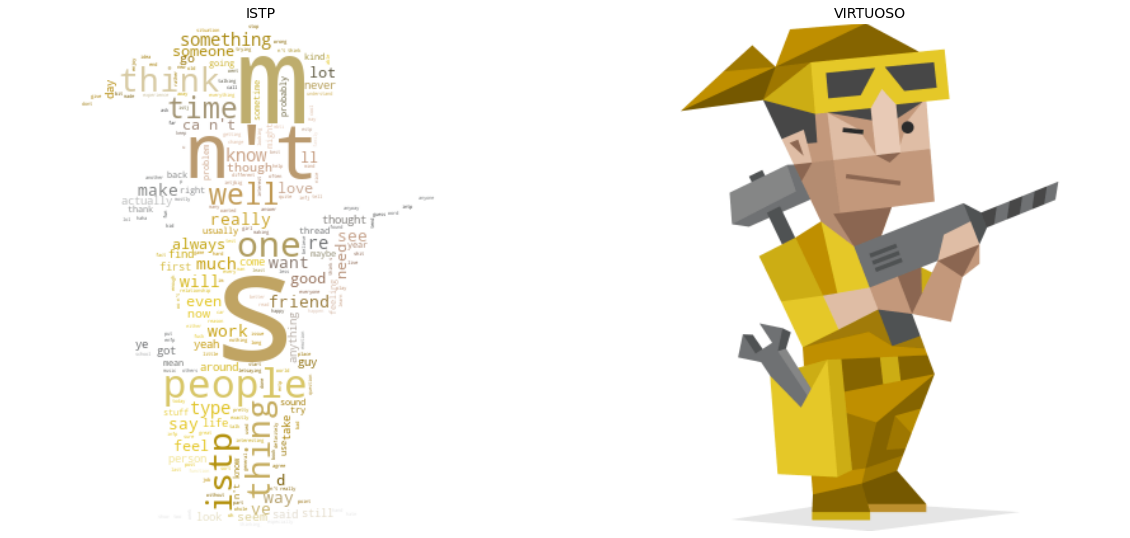

In [82]:
import cv2
dataFile_13 = df[df['type'] == 'ISTP']
text = str(dataFile_13['posts'].tolist())
img13=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/istp.png') #Please add your path here
imgr13=cv2.cvtColor(img13,cv2.COLOR_BGR2RGB)
ISTP_mask = np.array(imgr13)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ISTP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ISTP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ISTP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('VIRTUOSO', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

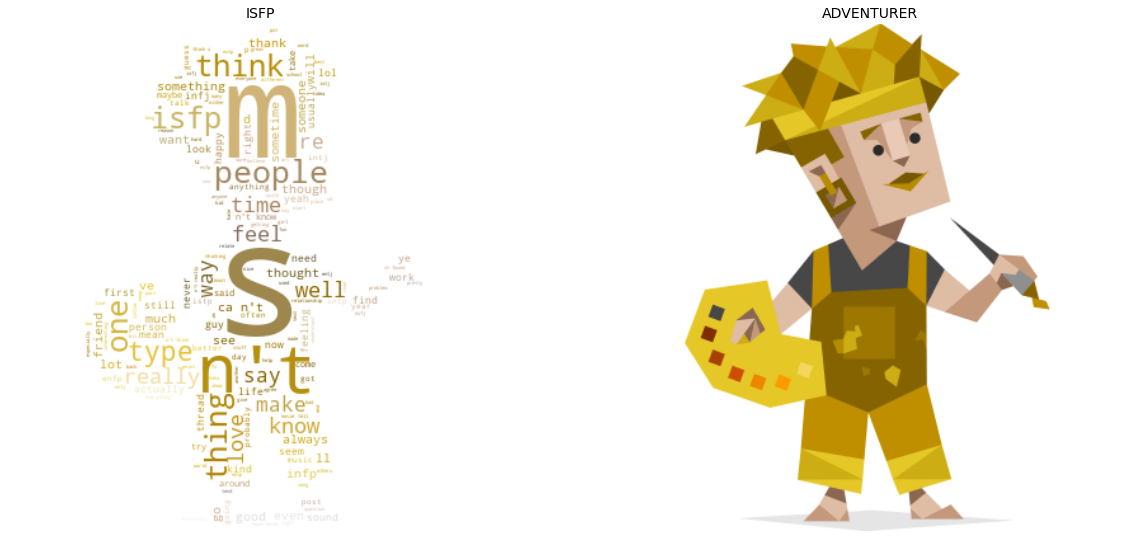

In [83]:
import cv2
dataFile_14 = df[df['type'] == 'ISFP']
text = str(dataFile_14['posts'].tolist())
img14=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/isfp.png')#Please add your path here
imgr14=cv2.cvtColor(img14,cv2.COLOR_BGR2RGB)
ISFP_mask = np.array(imgr14)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ISFP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ISFP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ISFP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ADVENTURER', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

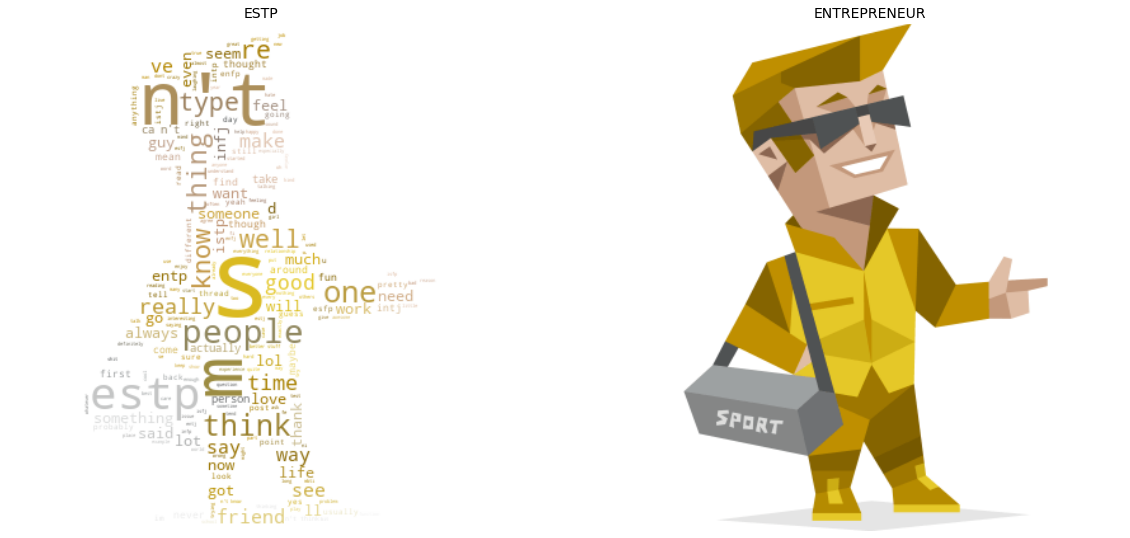

In [84]:
import cv2
dataFile_15 = df[df['type'] == 'ESTP']
text = str(dataFile_15['posts'].tolist())
img15=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/estp.png')#Please add your path here
imgr15=cv2.cvtColor(img15,cv2.COLOR_BGR2RGB)
ESTP_mask = np.array(imgr15)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ESTP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)

# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ESTP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ESTP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ENTREPRENEUR', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

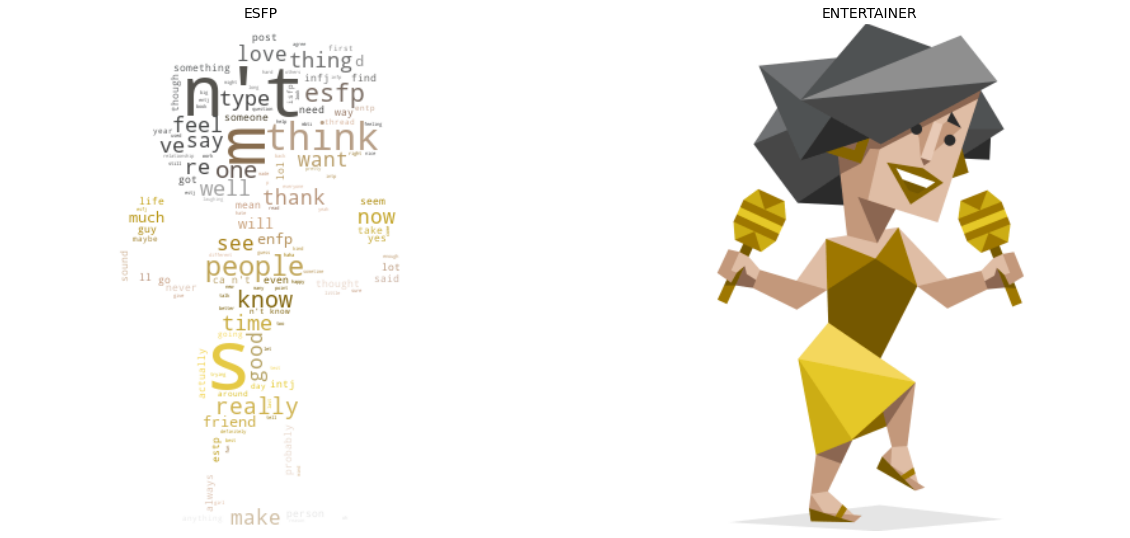

In [85]:
import cv2
from nltk.tokenize import word_tokenize
dataFile_16 = df[df['type'] == 'ESFP']
text = str(dataFile_16['posts'].tolist())
img16=cv2.imread('C:/Users/antra malik/Downloads/Project/Data Set and Images used/esfp.png') #Please add your path here
imgr16=cv2.cvtColor(img16,cv2.COLOR_BGR2RGB)
ESFP_mask = np.array(imgr16)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ESFP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ESFP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ESFP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ENTERTAINER', loc='Center', fontsize=14)
plt.axis("off")